In [1]:
import pandas as pd

#Load dataset
df = pd.read_csv('Water Quality and Sewage Systems.csv')
df.head()

,Geographical Location (Latitude),Geographical Location (Longitude),Sampling Date,Nitrogen (mg/L),Phosphorus (mg/L),State of Sewage System,Location
0,5.201086,-55.029673,6/10/2022,7.181860,2.320506,Good,"(-55.0296727856018, 5.20108555552281)"
1,-64.196408,94.483268,10/12/2018,9.735685,1.015308,Good,"(94.4832681627824, -64.1964082663717)"
2,-7.892940,-90.503109,2/16/2023,6.778074,4.718452,Good,"(-90.5031094894867, -7.89294020102126)"
3,-11.334248,110.778986,10/17/2021,3.340601,3.315705,Moderate,"(110.778986436187, -11.3342483161185)"
4,-24.532061,-147.588402,12/1/2021,8.753211,4.682091,Good,"(-147.588401569799, -24.5320612303279)"


In [2]:
#Converting relevant columns to appropriate data types if needed
df['Sampling Date'] = pd.to_datetime(df['Sampling Date'])
df['Sampling Date'] = df['Sampling Date'].dt.year

,Geographical Location (Latitude),Geographical Location (Longitude),Sampling Date,Nitrogen (mg/L),Phosphorus (mg/L),State of Sewage System,Location
0,5.201086,-55.029673,2022,7.181860,2.320506,Good,"(-55.0296727856018, 5.20108555552281)"
1,-64.196408,94.483268,2018,9.735685,1.015308,Good,"(94.4832681627824, -64.1964082663717)"
2,-7.892940,-90.503109,2023,6.778074,4.718452,Good,"(-90.5031094894867, -7.89294020102126)"
3,-11.334248,110.778986,2021,3.340601,3.315705,Moderate,"(110.778986436187, -11.3342483161185)"
4,-24.532061,-147.588402,2021,8.753211,4.682091,Good,"(-147.588401569799, -24.5320612303279)"


In [3]:
#Dropping rows with missing values
df.dropna(inplace=True)

#Checking if there are any duplicates in the dataset
df.duplicated().sum()

30060

In [4]:
#Removing all the duplicates
df= df.drop_duplicates()

#Displaying a sample of the cleaned dataset
df.head()

,Geographical Location (Latitude),Geographical Location (Longitude),Sampling Date,Nitrogen (mg/L),Phosphorus (mg/L),State of Sewage System,Location
0,5.201086,-55.029673,2022,7.181860,2.320506,Good,"(-55.0296727856018, 5.20108555552281)"
1,-64.196408,94.483268,2018,9.735685,1.015308,Good,"(94.4832681627824, -64.1964082663717)"
2,-7.892940,-90.503109,2023,6.778074,4.718452,Good,"(-90.5031094894867, -7.89294020102126)"
3,-11.334248,110.778986,2021,3.340601,3.315705,Moderate,"(110.778986436187, -11.3342483161185)"
4,-24.532061,-147.588402,2021,8.753211,4.682091,Good,"(-147.588401569799, -24.5320612303279)"


In [5]:
average_nitrogen = df['Nitrogen (mg/L)'].mean()
print("Average Nitrogen Concentration (mg/L):", average_nitrogen)

Average Nitrogen Concentration (mg/L): 5.020690342416667


In [6]:
filtered_samples = df[(df['Nitrogen (mg/L)'] > 7) & (df['Phosphorus (mg/L)'] > 2)]
num_filtered_samples = filtered_samples.shape[0]
print("Number of samples with nitrogen > 7 mg/L and phosphorus > 2 mg/L:", num_filtered_samples)

Number of samples with nitrogen > 7 mg/L and phosphorus > 2 mg/L: 1792


In [7]:
moderate_sewage_2022 = df[(df['Sampling Date'] == 2022) & (df['State of Sewage System'] == 'Moderate')]
num_moderate_2022 = moderate_sewage_2022.shape[0]
print("Number of samples in 2022 with 'Moderate' sewage system condition:", num_moderate_2022)

Number of samples in 2022 with 'Moderate' sewage system condition: 305


In [8]:
avg_nitrogen_by_condition = df.groupby('State of Sewage System')['Nitrogen (mg/L)'].mean()
print("Average Nitrogen Concentration by Sewage System Condition:")
print(avg_nitrogen_by_condition)

Average Nitrogen Concentration by Sewage System Condition:
State of Sewage System
Good        5.004786
Moderate    5.011286
Poor        5.077880
Name: Nitrogen (mg/L), dtype: float64


In [9]:
top_10_locations_nitrogen = df[['Location', 'Nitrogen (mg/L)']].sort_values(by='Nitrogen (mg/L)', ascending=False).head(10)
print("Top 10 Locations with Highest Nitrogen Concentration Levels:")
print(top_10_locations_nitrogen)

Top 10 Locations with Highest Nitrogen Concentration Levels:
                                    Location  Nitrogen (mg/L)
7766    (10.1469848277472, 29.4930125568828)         9.999745
2308  (-127.034534383675, -62.8814611444675)         9.999671
4063    (-69.7811250088477, 9.5868910356605)         9.993792
448   (-160.083406267531, -42.4573683862447)         9.993615
2964  (-169.998103408537, -23.7936766766695)         9.992116
6948   (-77.5599250313914, 80.6302867788605)         9.990175
7402    (171.989135264204, 75.0443186760167)         9.988890
9249    (139.849592662395, 64.2028091199994)         9.987240
3488   (124.236094305248, -77.3674324418235)         9.987170
7089    (6.95073176455571, 60.1181748428543)         9.986979


In [10]:
top_5_regions_nitrogen = df.groupby('Location')['Nitrogen (mg/L)'].mean().sort_values(ascending=False).head(5).index
top_5_samples = df[df['Location'].isin(top_5_regions_nitrogen)]
average_phosphorus_top_5 = top_5_samples['Phosphorus (mg/L)'].mean()
print("Average Phosphorus Concentration in Top 5 Regions with Highest Average Nitrogen Levels:", average_phosphorus_top_5)

Average Phosphorus Concentration in Top 5 Regions with Highest Average Nitrogen Levels: 2.6650639488000003


In [13]:
# Calculate the overall average phosphorus level
average_phosphorus = df['Phosphorus (mg/L)'].mean()

# Filter data for regions with "Good" sewage system condition and phosphorus above the average
filtered_data = df[(df['State of Sewage System'] == 'Good') & (df['Phosphorus (mg/L)'] > average_phosphorus)]

# Calculate the average nitrogen concentration for the filtered data
average_nitrogen_good_high_phosphorus = filtered_data['Nitrogen (mg/L)'].mean()
print("Average Nitrogen Concentration in 'Good' Sewage System Regions with Above-Average Phosphorus:", average_nitrogen_good_high_phosphorus)

Average Nitrogen Concentration in 'Good' Sewage System Regions with Above-Average Phosphorus: 4.96530980076709


Average Phosphorus Level by Sewage System Condition:
State of Sewage System
Good        2.495554
Moderate    2.514352
Poor        2.487566
Name: Phosphorus (mg/L), dtype: float64


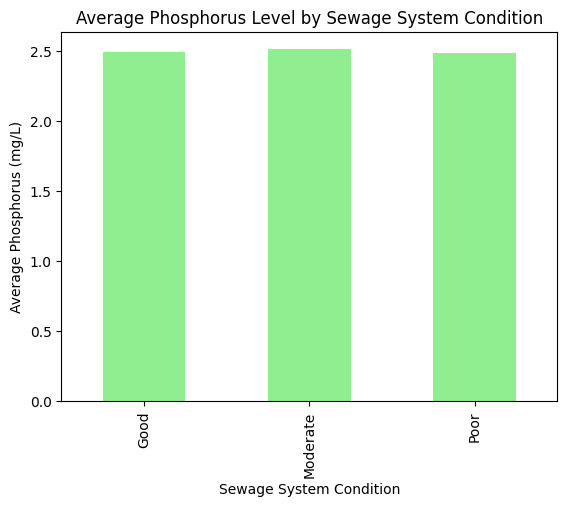

In [14]:
import matplotlib.pyplot as plt

# Calculate the average phosphorus level by sewage system condition
avg_phosphorus_by_condition = df.groupby('State of Sewage System')['Phosphorus (mg/L)'].mean()

print("Average Phosphorus Level by Sewage System Condition:")
print(avg_phosphorus_by_condition)

# Plotting the results
avg_phosphorus_by_condition.plot(kind='bar', color='lightgreen')
plt.title('Average Phosphorus Level by Sewage System Condition')
plt.xlabel('Sewage System Condition')
plt.ylabel('Average Phosphorus (mg/L)')
plt.show()

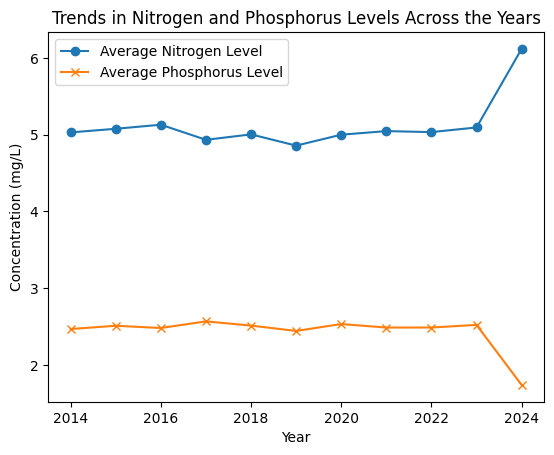

In [19]:
avg_nitrogen_by_year = df.groupby('Sampling Date')['Nitrogen (mg/L)'].mean()
avg_phosphorus_by_year = df.groupby('Sampling Date')['Phosphorus (mg/L)'].mean()

plt.plot(avg_nitrogen_by_year, label='Average Nitrogen Level', marker='o')
plt.plot(avg_phosphorus_by_year, label='Average Phosphorus Level', marker='x')
plt.title('Trends in Nitrogen and Phosphorus Levels Across the Years')
plt.xlabel('Year')
plt.ylabel('Concentration (mg/L)')
plt.legend()
plt.show()

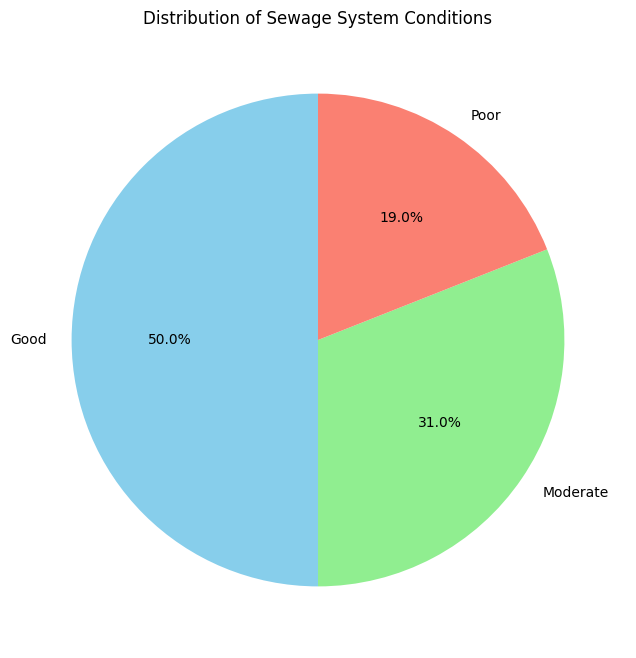

In [20]:
# Count the number of samples for each sewage system condition
sewage_condition_counts = df['State of Sewage System'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sewage_condition_counts, labels=sewage_condition_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'salmon'])
plt.title('Distribution of Sewage System Conditions')
plt.show()